In [6]:
pip install tensorflow-cpu opencv-python

     |████████████████████████████████| 60.3 MB 16.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

2021-12-27 18:45:53.047733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16719872/16705208 [==============================] - 0s 0us/step


In [2]:
import json

import cv2 as cv
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO

from keras import applications as pretrained
from keras.preprocessing import image

from sklearn.metrics.pairwise import cosine_similarity


def get_embedding(img):
    x = pretrained.efficientnet.preprocess_input(img)
    return base_model.predict(x)

%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [3]:
mats = pd.read_csv("in/tables/MATERIALS_FOR_CLASSIFICATION_CLEAN.csv")

In [4]:
cats = pd.read_csv("in/tables/MATERIAL_CATEGORY_FOR_CLASSIFICATION.csv")
# cats = cats[~cats.duplicated(subset="MATERIAL_ODS_ID")].copy()
cats.CATEGORY_PATH.unique()

array(['Hobby a zahrada > Nářadí elektrické > Pily > Pily ocasky',
       'Hobby a zahrada > Ruční nářadí > Ostatní ruční nářadí',
       'Hobby a zahrada > Nářadí zahradní > Nůžky zahradní',
       'Hobby a zahrada > Potřeby pro průmysl, obchod > Cedule, samolepky s piktogramy',
       'Hobby a zahrada > Zahradní a travní doplňky > Osiva, travní směsy',
       'Hobby a zahrada > Dům, byt > Koupelna, sanitarni technika > WC sedátka',
       'Hobby a zahrada > Dům, byt > Koupelna a sanitární technika > Toalety',
       'Hobby a zahrada > Nářadí elektrické > Příslušenství',
       'Hobby a zahrada > Nářadí elektrické > Příslušenství > Kotouče > Diamantové kotouče',
       'Hobby a zahrada > Ohřev vody, vytápění > Topidla > Radiátory',
       'Hobby a zahrada > Stavební materiál > Kotvící materiál > Stahovací pásky',
       'Hobby a zahrada > Zahradní nábytek > Slunečníky, zastínění > Markýzy',
       'Hobby a zahrada > Zahradní nábytek > Sety nábytku',
       'Hobby a zahrada > Dům, byt 

In [5]:
merge = pd.merge(mats,cats,on=["MATERIAL_ODS_ID","SHOP"])

In [6]:
images = pd.read_csv("in/tables/MATERIAL_IMAGE_FOR_CLASSIFICATION.csv")

In [7]:
merge = pd.merge(merge,images,on="MATERIAL_ODS_ID")

In [8]:
merge = merge[~merge.duplicated(subset="MATERIAL_ID")].reset_index()

## Try on sekačky

In [9]:
merge = merge[(merge.CATEGORY_PATH.str
               .contains("Hobby a zahrada > Zahradní technika > Sekačk"))].copy()


In [35]:
def initialize_CNN():
    base_model = tf.keras.applications.efficientnet.EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")
    return base_model

def download_images(subset):
    size = subset.shape[0]
    image_array = np.empty((size,224,224,3))
    for i,row in subset.iterrows():
        response = requests.get(row.URL_y)
        image = Image.open(BytesIO(response.content))
        img = np.array(image)
        if len(img.shape) < 3:
            img = np.array(image.convert("RGB"))

        resized_image = cv.resize(img, (224,224))
        images_array[i,:,:,:3] = resized_image[:,:,:3]
    return image_array

def get_embeddings(images_array):
    feature_vectors = np.empty((size,1,1280))
    
    for i, img in enumerate(images):
        feature_vectors[i] = get_embedding(img).flatten()
        
def get_similiarity(features):
    similiarities = cosine_similarity(feature_vectors[:,0,:], feature_vectors[:,0,:])
    return similiarities
    
def find_misfit_images(subset, similiarities):
    subset.loc[similiarities[i] < 0.75,"MISFIT"] = 1
    return subset

In [10]:
subset = merge.reset_index().copy()

size = subset.shape[0]
images_array = np.empty((size,224,224,3))
for i,row in subset[:size].iterrows():
    response = requests.get(row.IMAGE_URL)
    image = Image.open(BytesIO(response.content))
    img = np.array(image)
    if len(img.shape) < 3:
        img = np.array(image.convert("RGB"))

    resized_image = cv.resize(img, (224,224))
    if len(resized_image.shape) == 3:
        images_array[i,:,:,:3] = resized_image[:,:,:3]
    else:
        images_array[i] = np.nan
        print(row.URL_y)

indexes = list(set(np.argwhere(np.isnan(images_array))[:,0]))
images_array = np.delete(images_array,indexes,axis=0)
subset = subset.drop(indexes)


/home/default/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [80]:

size = images.shape[0]

feature_vectors = get_embedding(images_array)

similiarities = cosine_similarity(feature_vectors, feature_vectors)


In [88]:
feature_vectors

array([[-0.0857489 , -0.10608143, -0.17120993, ...,  0.05454125,
        -0.1347089 , -0.16114654],
       [-0.10512289, -0.09169601, -0.19512022, ..., -0.06731419,
        -0.08720246, -0.17442466],
       [-0.03423626,  0.35930237, -0.05627619, ...,  0.08369493,
        -0.089684  , -0.10540015],
       ...,
       [ 0.3632385 , -0.03344429, -0.17928599, ...,  1.2808462 ,
         0.16144875,  0.32547954],
       [ 0.2467518 , -0.08406635, -0.20484814, ..., -0.08327307,
        -0.15025823, -0.23975949],
       [ 0.06215937, -0.12827998, -0.07435389, ..., -0.16599579,
        -0.14365414,  0.27829888]], dtype=float32)

/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


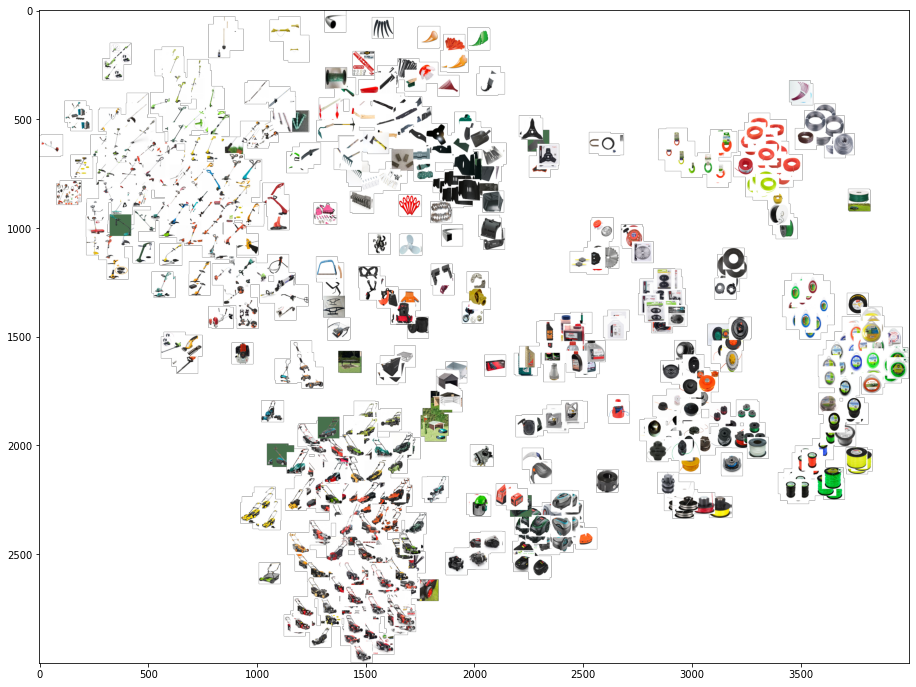

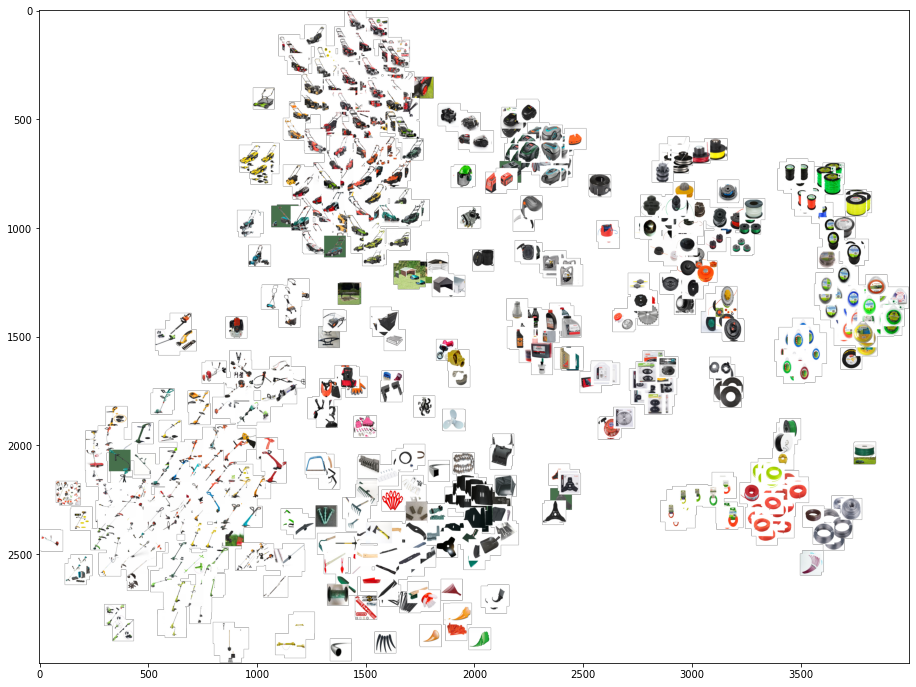

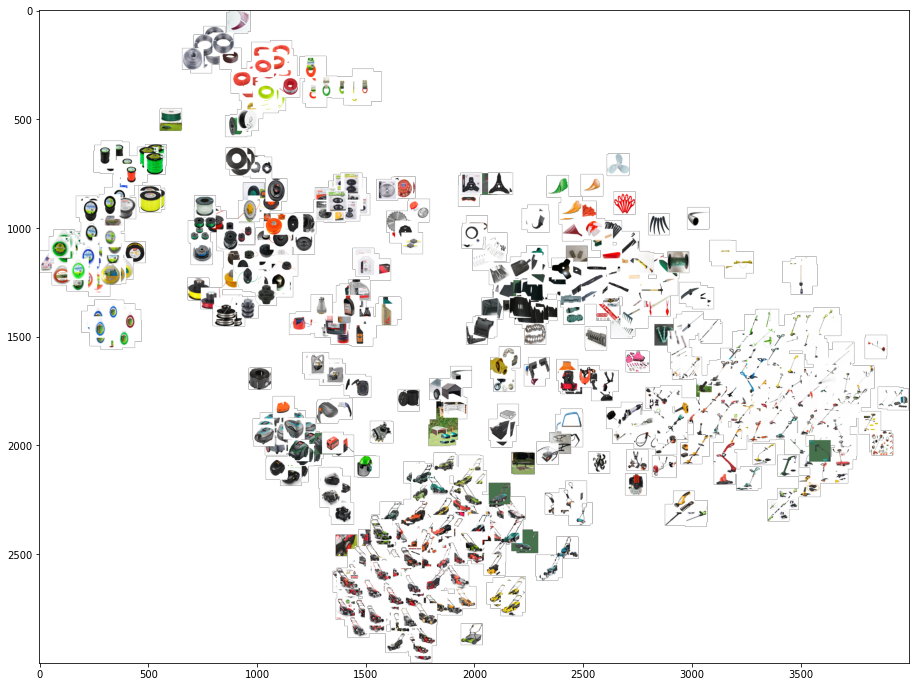

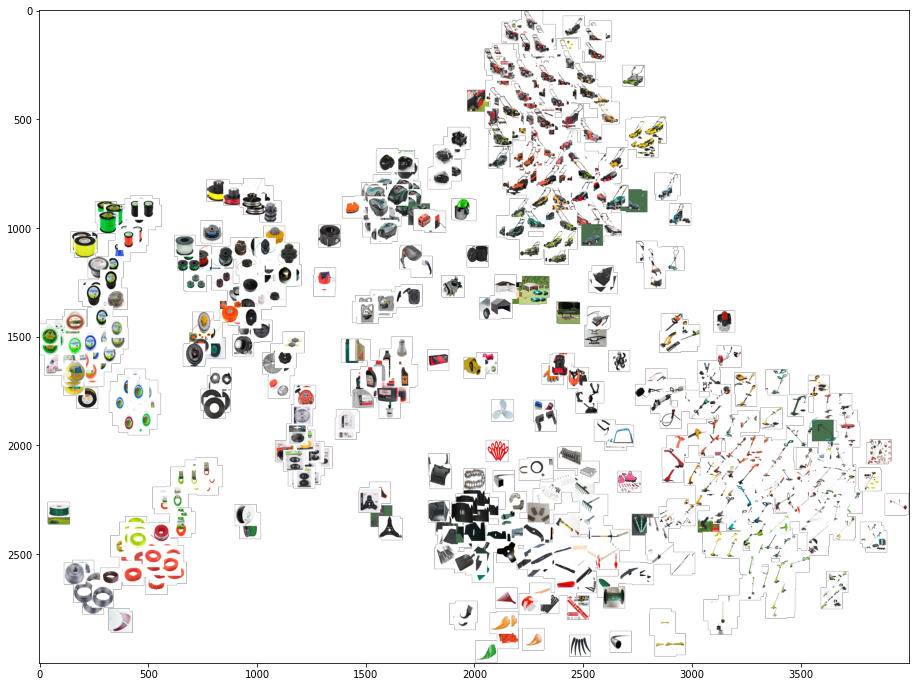

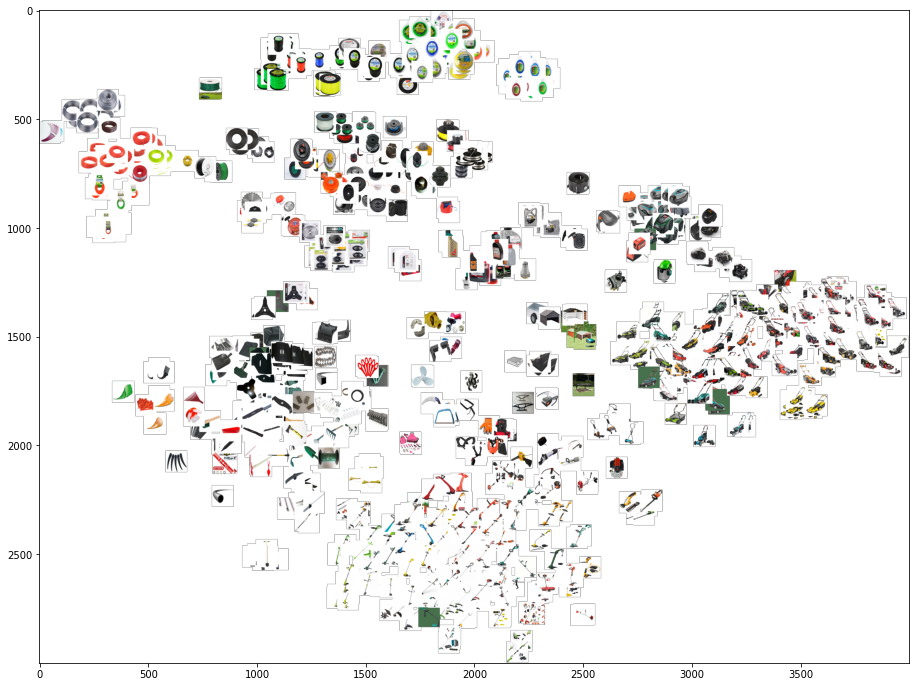

In [96]:
for j in range(5):
    X = np.array(feature_vectors)
    tsne = TSNE(n_components=2, learning_rate=10, perplexity=30, angle=0.2, n_iter=2000).fit_transform(X)

    tx, ty = tsne[:,0], tsne[:,1]
    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 100
    # images_array = images_array[subset[subset.similiar.notna()].index]
    full_image = Image.new('RGBA', (width, height))

    for img, x, y in zip(images_array, tx, ty):
    #     tile = Image.open(img)
        tile = Image.fromarray(img.astype(np.uint8))
        rs = max(1, tile.width/max_dim, tile.height/max_dim)
        tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
        full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

    matplotlib.pyplot.figure(figsize = (16,12))
    imshow(full_image)
    name = subset.CATEGORY_NAME.unique()[0]
    full_image.save(f'TSNE_{j}.png')

In [120]:
from sklearn.decomposition import PCA

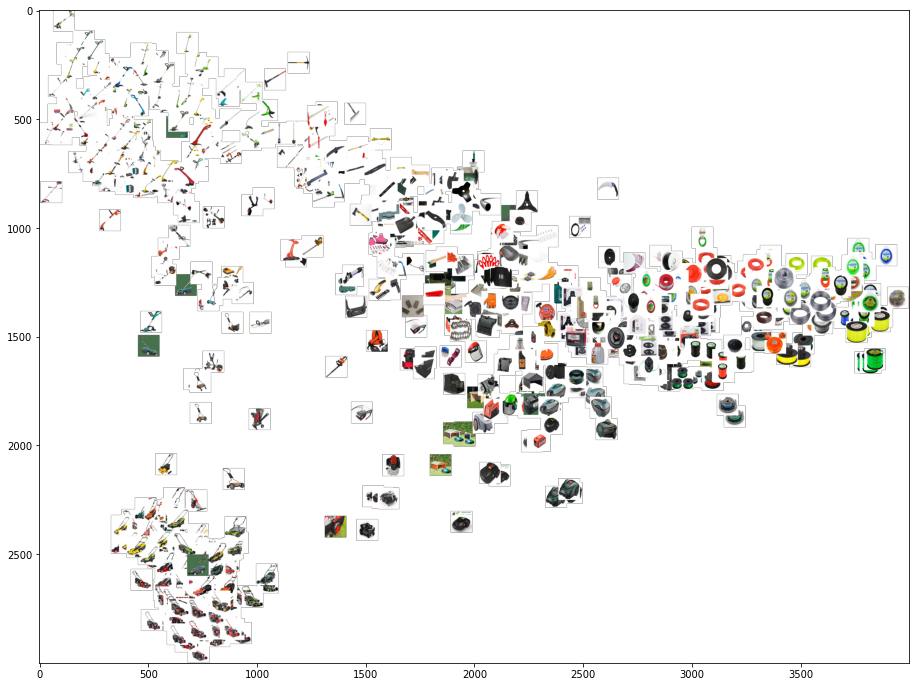

In [124]:
X = np.array(feature_vectors)
pca = PCA(n_components=2)
tsne = pca.fit_transform(feature_vectors)
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

width = 4000
height = 3000
max_dim = 100
# images_array = images_array[subset[subset.similiar.notna()].index]
full_image = Image.new('RGBA', (width, height))

for img, x, y in zip(images_array, tx, ty):
#     tile = Image.open(img)
    tile = Image.fromarray(img.astype(np.uint8))
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)
name = subset.CATEGORY_NAME.unique()[0]
full_image.save(f'PCA_image.png')

In [131]:
pip install umap-learn

     |████████████████████████████████| 86 kB 10.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.1 MB 43.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 15.4 MB 105.2 MB/s            
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=93cd64b4f25c31d4e3e4364bd3fc5ffb484b013260a14b50a63e1b53ef6e4548
  Stored in directory: /tmp/pip/wheels/4a/66/81/205d77bd58539a1d07fb8b795fcea0b17f4d59912c0f4202b7
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=f7ad27452c366e5761a0de39df880594ed64e1f08e59cb55d10c7c6eb8d67f1e
  Stored in directory: /tmp/pip/wheels/47/8c/05/65ea39bbebd7fa341790e50ae16e50b17fa091021e54f42b84
Successfully built umap-learn pynndescent
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
N

In [12]:
# np.save("image_embd.npy",feature_vectors)
feature_vectors = np.load("image_embd.npy")

In [14]:
import umap

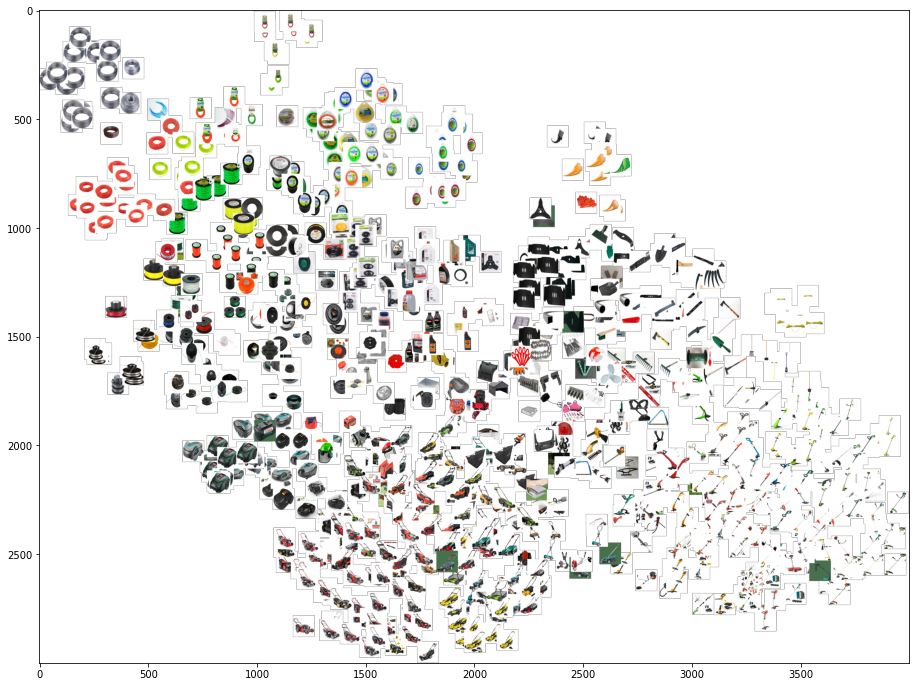

In [38]:
for j in range(1):
    X = np.array(feature_vectors)
    reducer = umap.UMAP(n_neighbors=200, min_dist=1, spread=1)
    tsne = reducer.fit_transform(X)
    tx, ty = tsne[:,0], tsne[:,1]
    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 100
    # images_array = images_array[subset[subset.similiar.notna()].index]
    full_image = Image.new('RGBA', (width, height))

    for img, x, y in zip(images_array, tx, ty):
    #     tile = Image.open(img)
        tile = Image.fromarray(img.astype(np.uint8))
        rs = max(1, tile.width/max_dim, tile.height/max_dim)
        tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
        full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

    matplotlib.pyplot.figure(figsize = (16,12))
    imshow(full_image)
    name = subset.CATEGORY_NAME.unique()[0]
    full_image.save(f'UMAP_test_{j}.png')

# text tsne

In [97]:
FILES_PATH = '/data/in/files/'


In [98]:
# import libraries
import os
import sys
import re

# get files not ending with manifest
script_files = [f for f in os.listdir(FILES_PATH) if re.match(r'^[0-9]+_.+$', f) and not f.endswith('.manifest')]

# create new name for files
rename_dict = {f: re.sub(r'^[0-9]+_(.*)', '\\1', f) for f in script_files}

# rename files
for old, new in rename_dict.items():
    os.rename(f'{FILES_PATH}{old}', f'{FILES_PATH}{new}')
    print(f'In {FILES_PATH}, {old} renamed to {new}')
    
# add FILES_PATH to sys.path
sys.path.append(FILES_PATH)


In /data/in/files/, 349419987_cc.cs.300.bin.gz renamed to cc.cs.300.bin.gz


In [99]:
import json

import numpy as np
import pandas as pd
from tqdm import tqdm

from fasttext import FastText


In [100]:
from sh import gunzip
from sklearn.preprocessing import FunctionTransformer

# unzip fastext models
gunzip(f"{FILES_PATH}"+"cc.cs.300.bin.gz")

In [101]:
fasttext = FastText.load_model(f"{FILES_PATH}"+"cc.cs.300.bin")



def encode_dataframe(X):
    return np.array([fasttext.get_sentence_vector(i) for i in X])

transform_text = FunctionTransformer(encode_dataframe)

In [102]:
df = merge.copy()

In [103]:
ft_vectors = [fasttext.get_sentence_vector(i) for i in df.NAME_BRIEF]

In [142]:
np.save("text_embd.npy",ft_vectors)

/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


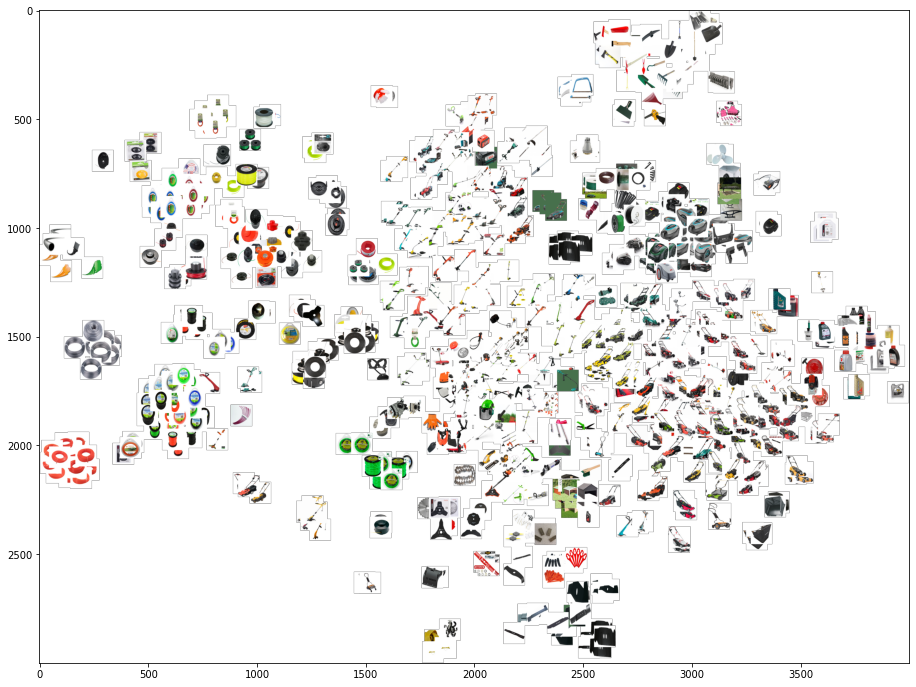

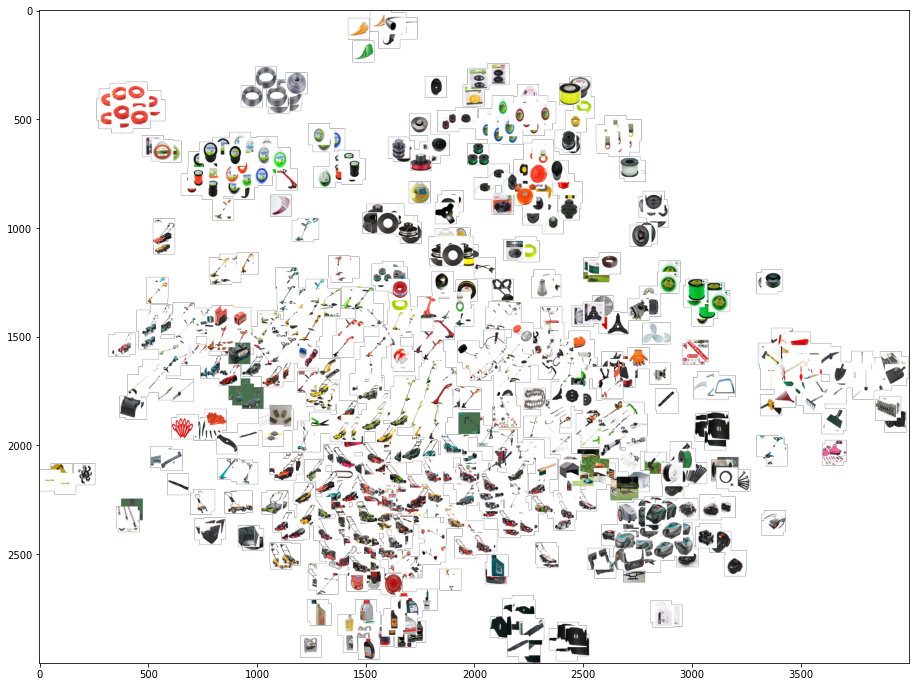

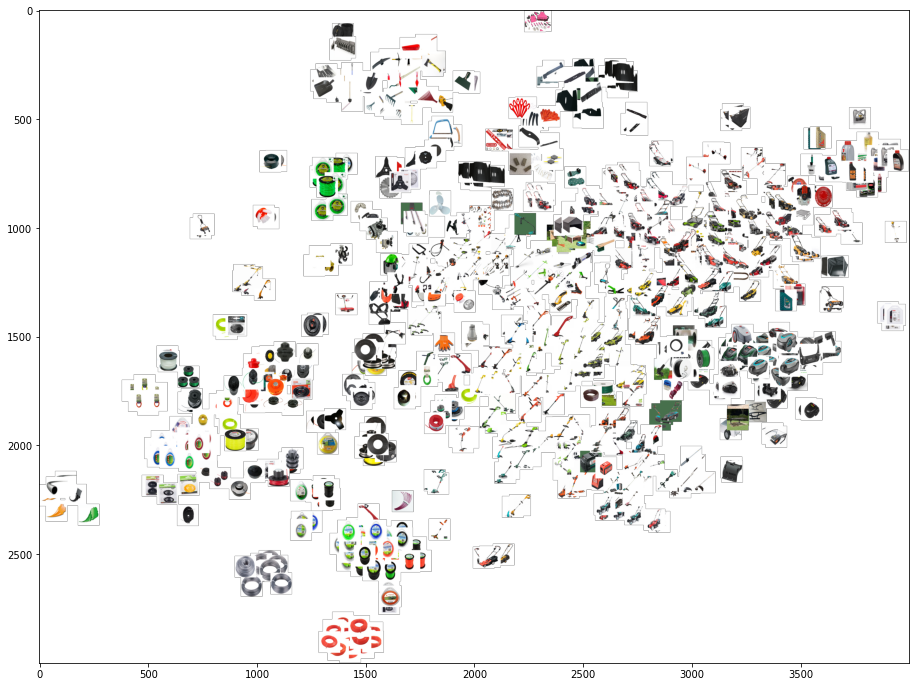

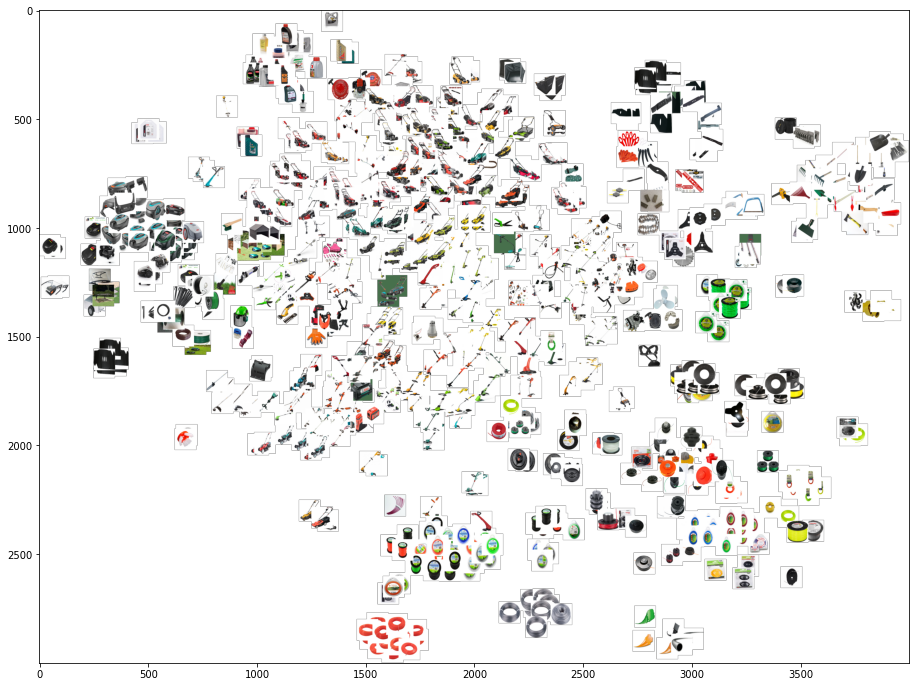

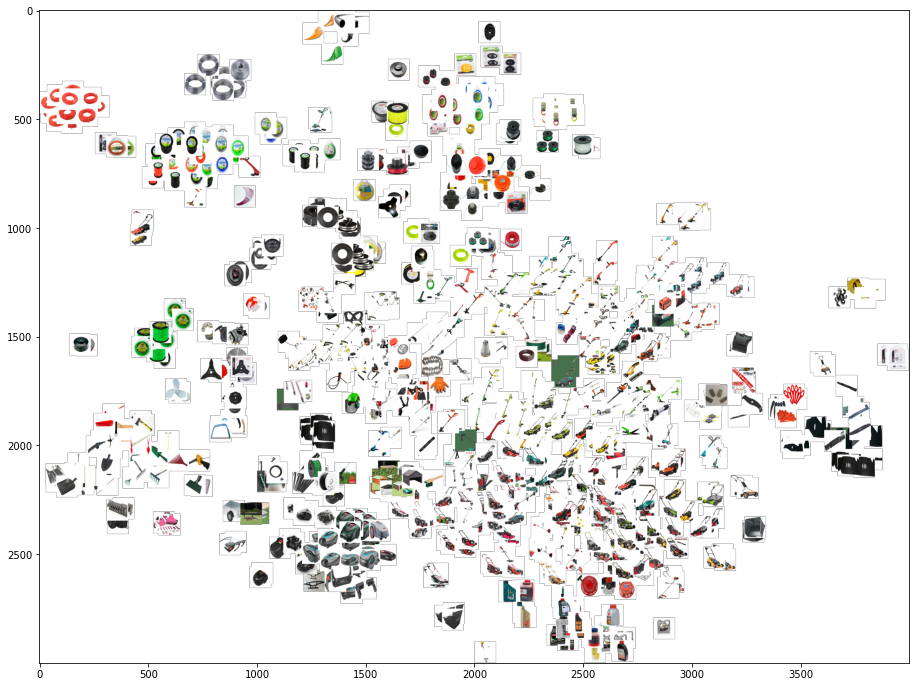

In [111]:
import matplotlib.pyplot as plt
for j in range(5):
    tsne = TSNE(n_components=2, 
                learning_rate=10, 
                perplexity=30, 
                angle=0.2, 
                n_iter=2000).fit_transform(ft_vectors)


    tx, ty = tsne[:,0], tsne[:,1]
    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 100
    # images_array = images_array[subset[subset.similiar.notna()].index]
    full_image = Image.new('RGBA', (width, height))

    width = 4000
    height = 3000
    max_dim = 100
    # images_array = images_array[subset[subset.similiar.notna()].index]
    full_image = Image.new('RGBA', (width, height))

    labels = df.NAME.str.split().apply(lambda x: " ".join(x[:3])).values

    for img, x, y in zip(images_array, tx, ty):
        tile = Image.fromarray(img.astype(np.uint8))
        rs = max(1, tile.width/max_dim, tile.height/max_dim)
        tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
        full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

    matplotlib.pyplot.figure(figsize = (16,12))
    imshow(full_image)
    name = subset.CATEGORY_NAME.unique()[0]
    full_image.save(f'TSNE_text_{j}.png')